Pregunta 1).
------------------
Se analizará la relación causal entre los años de educación y los retornos salariales para el año 2019. La base teórica que sustenta esta relación es la ecuación de Mincer (1974), la cual resalta que la educación juega un rol importante en el estudio de la economía laboral y del capital humano.

Los individuos más capacitados reciben un mayor salario y,por ende, experimentan un menor desempleo en comparación a los menos educados. Por ello, podemos decir que si aumenta los años de educación, aumentarían los ingresos.

Pregunta 2).
-------------

In [1]:
pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10736 sha256=c51c9fe3a7b40379d89639f35b270317e0b5834ad8a36166dafb759bad08ebad
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf
from empiricaldist import Cdf
from scipy.stats import linregress #es MCO
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df1 = pd.read_stata('enaho01-2019-200.dta',convert_categoricals=False)
df1.head()

,aÑo,mes,nconglome,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p201p,p203,p203a,p203b,p204,p205,p206,p207,p208a,p208b,p209,p210,p211a,p211d,p212,p213,p214,p215,p216,p217,t211,ticuest01,codtarea,codtiempo,ocupac_r3,ocupac_r4,rama_3,rama_4,facpob07
0,2019,01,007076,005009,041,11,01,010101,4,4,20180050090411101,1,1.0,1.0,1.0,2.0,NaN,2.0,60.0,NaN,6.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,NaN,NaN,2,,,NaN,NaN,NaN,NaN,94.218208
1,2019,01,007076,005009,041,11,02,010101,4,4,20180050090411102,3,1.0,3.0,1.0,2.0,NaN,2.0,28.0,NaN,6.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,0.0,NaN,NaN,2,,,NaN,NaN,NaN,NaN,94.218208
2,2019,01,007076,005009,056,11,01,010101,4,4,20180050090561101,1,1.0,1.0,1.0,2.0,NaN,2.0,48.0,NaN,5.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,NaN,NaN,2,,,NaN,NaN,NaN,NaN,94.218208
3,2019,01,007076,005009,056,11,02,010101,4,4,20180050090561102,3,1.0,3.0,1.0,2.0,NaN,2.0,25.0,NaN,6.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,0.0,NaN,NaN,2,,,NaN,NaN,NaN,NaN,94.218208
4,2019,01,007076,005009,056,11,03,010101,4,4,20180050090561104,3,1.0,3.0,1.0,2.0,NaN,2.0,16.0,NaN,6.0,1.0,NaN,74.0,3.0,3.0,3.0,4.0,0.0,NaN,NaN,2,0,1,572.0,5212.0,5232.0,4771.0,94.218208


In [5]:
df1.columns

Index(['aÑo', 'mes', 'nconglome', 'conglome', 'vivienda', 'hogar', 'codperso',
       'ubigeo', 'dominio', 'estrato', 'p201p', 'p203', 'p203a', 'p203b',
       'p204', 'p205', 'p206', 'p207', 'p208a', 'p208b', 'p209', 'p210',
       'p211a', 'p211d', 'p212', 'p213', 'p214', 'p215', 'p216', 'p217',
       't211', 'ticuest01', 'codtarea', 'codtiempo', 'ocupac_r3', 'ocupac_r4',
       'rama_3', 'rama_4', 'facpob07'],
      dtype='object')

In [6]:
df1.rename(columns = {'p208a':'edad','p207':'sexo'}, inplace=True)

In [7]:
df1=df1[['conglome','vivienda','hogar','codperso','ubigeo','edad','sexo','facpob07']]
df1.head()

,conglome,vivienda,hogar,codperso,ubigeo,edad,sexo,facpob07
0,005009,041,11,01,010101,60.0,2.0,94.218208
1,005009,041,11,02,010101,28.0,2.0,94.218208
2,005009,056,11,01,010101,48.0,2.0,94.218208
3,005009,056,11,02,010101,25.0,2.0,94.218208
4,005009,056,11,03,010101,16.0,2.0,94.218208


In [16]:
df2 = pd.read_stata('enaho01a-2019-300.dta', convert_categoricals=False)
df2.head()

,aÑo,mes,nconglome,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,p300n,p300i,p300a,p301a,p301b,p301c,p301d,p301a0,p301a1,p301b0,p301b1,p301b3,p302,p302x,p302a,p302b,p303,p304a,p304b,p304c,p304d,p305,p306,p307,p308a,p308b,p308c,p308d,p308b1,...,i311d5_5,i311d6_5,i311d7_5,i311d2_7,i311d3_7,i311d4_7,i311d5_7,i311d6_7,i311d7_7,i3121b,i3122b,i3121c2,i3121c3,i3121c4,i3121c5,i3121c6,i3122c2,i3122c3,i3122c4,i3122c5,i3122c6,i315a,i315b2,i315b3,i315b4,i315b5,i315b6,i311d_1,i311d_2,i311d_3,i311d_4,i311d_5,i311d_6,i311d_7,i3121c,i3122c,i315b,imputado,factor07,factora07
0,2019,01,007076,005009,041,11,01,010101,4,4,01,1,1,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.218208,73.243919
1,2019,01,007076,005009,041,11,02,010101,4,4,02,2,2,4.0,10.0,5.0,NaN,1.0,0.0,332336.0,0.0,160000076.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.218208,111.098007
2,2019,01,007076,005009,056,11,01,010101,4,4,01,1,1,4.0,5.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.218208,73.243919
3,2019,01,007076,005009,056,11,02,010101,4,4,02,2,2,4.0,6.0,5.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.218208,111.098007
4,2019,01,007076,005009,056,11,03,010101,4,4,03,3,3,4.0,6.0,5.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,5.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.218208,93.555817


In [17]:
df2.columns

Index(['aÑo', 'mes', 'nconglome', 'conglome', 'vivienda', 'hogar', 'codperso',
       'ubigeo', 'dominio', 'estrato',
       ...
       'i311d_4', 'i311d_5', 'i311d_6', 'i311d_7', 'i3121c', 'i3122c', 'i315b',
       'imputado', 'factor07', 'factora07'],
      dtype='object', length=476)

In [18]:
df2.p301c.value_counts(dropna=False)

NaN    90287
6.0     7925
3.0     4009
2.0     3704
4.0     3527
5.0     3367
1.0     3013
0.0      758
Name: p301c, dtype: int64

In [19]:
df2.p301b.value_counts(dropna=False)

5.0    33946
0.0    26339
3.0    16432
2.0    13545
1.0    11057
NaN     8357
4.0     6115
6.0      721
7.0       78
Name: p301b, dtype: int64

In [20]:
df2[['p301b','p301c']]=df2[['p301b','p301c']].fillna(0)

In [21]:
df2['años']=df2['p301b']+df2['p301c']

In [22]:
df2['años_educ']=((df2.p301a==11)*(df2.años+16)+
                   ((df2.p301a<11) & (df2.p301a>=7))*(df2.años+11)+
                   ((df2.p301a<7)  & (df2.p301a>=5))*(df2.años+6)+
                   ((df2.p301a<5)  & (df2.p301a>=3))*(df2.años)+
                   (df2.p301a<3)*(0))

In [23]:
df2.años_educ.value_counts(dropna=False)

11.0    21573
0.0     15188
5.0      8435
6.0      8041
14.0     7435
16.0     7290
3.0      5949
2.0      5676
8.0      5150
9.0      5085
4.0      4540
1.0      4404
7.0      4122
10.0     3593
12.0     3372
13.0     3182
15.0     1477
18.0     1249
17.0      829
Name: años_educ, dtype: int64

In [24]:
df2=df2[['conglome','vivienda','hogar','codperso','años_educ']]
df2.head()

,conglome,vivienda,hogar,codperso,años_educ
0,005009,041,11,01,0.0
1,005009,041,11,02,16.0
2,005009,056,11,01,10.0
3,005009,056,11,02,11.0
4,005009,056,11,03,11.0


In [28]:
df3 = pd.read_stata('enaho01a-2019-500.dta', convert_categoricals=False)
df3.head()

,aÑo,mes,nconglome,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,p500a,p500b,p500b1,p500c,p500d,p500d1,p500n,p500i,p501,p502,p503,p504,p5041,p5042,p5043,p5044,p5045,p5046,p5047,p5048,p5049,p50410,p50411,p505,p505r4,p505b,p506,p506r4,p507,...,i520,i530a,i524a1,i524b1,i524c1,i524d1,i524e1,i538a1,i538b1,i538c1,i538d1,i538e1,i541a,i5294b,i5404b,i521,i521a,i521b,i521b1,t558d1,t560_01,t560_02,t560_03,t560_04,t560_05,t560_06,t560_071,t560_072,t560_073,t560_074,t560_075,t560_076,t560_077,t560_078,t560_08,t560_09,t560_10,ocupinf,emplpsec,fac500a
0,2019,10,007060,005001,007,11,01,010101,4,4,01,15,09,2019,21,09,2019,01,01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,942.0,9121.0,0.0,9301.0,9601.0,2.0,...,NaN,4144.0,NaN,NaN,NaN,NaN,NaN,4192.0,0.0,0.0,0.0,4192.0,1928.0,NaN,NaN,2.0,NaN,NaN,NaN,,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,61.992706
1,2019,10,007060,005001,007,11,02,010101,4,4,02,15,09,2019,21,09,2019,02,02,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,80.713249
2,2019,10,007060,005001,007,11,03,010101,4,4,01,15,09,2019,21,09,2019,03,01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,942.0,9412.0,0.0,5520.0,5610.0,4.0,...,NaN,NaN,10780.0,1389.0,0.0,0.0,9391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,94.031921
3,2019,10,007060,005001,017,11,01,010101,4,4,01,15,09,2019,21,09,2019,01,01,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,39.721737
4,2019,10,007060,005001,017,11,02,010101,4,4,02,15,09,2019,21,09,2019,02,02,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572.0,5212.0,0.0,5232.0,4771.0,3.0,...,NaN,NaN,7187.0,0.0,0.0,0.0,7187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,94.031921


In [29]:
col=['i524a1', 'd529t', 'i530a', 'd536', 'i538a1', 'd540t', 'i541a', 'd543', 'd544t']
df3[col]=df3[col].fillna(0)
df3[col].isna().sum()

i524a1    0
d529t     0
i530a     0
d536      0
i538a1    0
d540t     0
i541a     0
d543      0
d544t     0
dtype: int64

#### Ingreso

In [30]:
df3['ingresos']=df3[col].sum(axis = 1)[(df3['ocu500']==1)]
df3['ingresos']=df3['ingresos']/12 #ingreso mensual
df3['ingresos'].describe()

count    64954.000000
mean      1121.905042
std       1464.993436
min          0.000000
25%        209.187500
50%        750.416667
75%       1487.833333
max      31679.666667
Name: ingresos, dtype: float64

In [31]:
df3=df3[['conglome','vivienda','hogar','codperso','ingresos','fac500a']]
df3.head()

,conglome,vivienda,hogar,codperso,ingresos,fac500a
0,005001,007,11,01,1092.333333,61.992706
1,005001,007,11,02,NaN,80.713249
2,005001,007,11,03,1353.416667,94.031921
3,005001,017,11,01,NaN,39.721737
4,005001,017,11,02,598.916667,94.031921


##### Fusión de bases

In [32]:
df1.shape

(128276, 8)

In [33]:
df2.shape

(116590, 5)

In [34]:
df3.shape

(92094, 6)

In [35]:
df_merge = df1.merge(df2, on=['conglome', 'vivienda', 'hogar', 'codperso'])

In [36]:
df_merge = df_merge.merge(df3, on=['conglome', 'vivienda', 'hogar', 'codperso'])

In [37]:
df_merge.shape

(92094, 11)

In [38]:
df_merge.head()

,conglome,vivienda,hogar,codperso,ubigeo,edad,sexo,facpob07,años_educ,ingresos,fac500a
0,005009,041,11,01,010101,60.0,2.0,94.218208,0.0,665.416667,73.243919
1,005009,041,11,02,010101,28.0,2.0,94.218208,16.0,0.000000,111.098007
2,005009,056,11,01,010101,48.0,2.0,94.218208,10.0,174.333333,73.243919
3,005009,056,11,02,010101,25.0,2.0,94.218208,11.0,958.083333,111.098007
4,005009,056,11,03,010101,16.0,2.0,94.218208,11.0,1115.333333,93.555817


In [39]:
print('La unidad de observación es la persona. Por eso, para hacer el merge se utilizaron las variables conglome, vivienda, hogar y codperso ')

La unidad de observación es la persona. Por eso, para hacer el merge se utilizaron las variables conglome, vivienda, hogar y codperso 


##### La unidad de observación es la persona. Por eso, para hacer el merge se utilizaron las variables conglome, vivienda, hogar y codperso. Por otro lado, la unión de los módulos 200, 300 y 500 de ENAHO fue para contar con variables como sexo, ingresos y años de educación y edad.

#### Variable Ingresos

In [40]:
df_merge['ingresos'].describe()

count    64954.000000
mean      1121.905042
std       1464.993436
min          0.000000
25%        209.187500
50%        750.416667
75%       1487.833333
max      31679.666667
Name: ingresos, dtype: float64

In [41]:
ingresos=df_merge.ingresos
cdf_ingresos = Cdf.from_seq(ingresos)

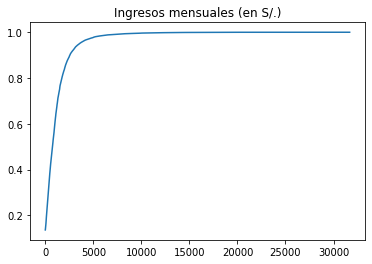

In [42]:
# probabilidad acumulada
cdf_ingresos.plot()
plt.title('Ingresos mensuales (en S/.)') 
plt.show()

Se observa que el 90% de la muestra gana menos 5000 soles mensuales. Se observa una brecha de ingresos que se concentra en una minoría

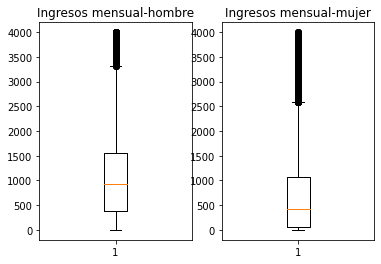

In [43]:
plt.subplot(1, 2, 1) # (filas, columnas, lugar de figura)
plt.boxplot(df_merge['ingresos'][(df_merge['sexo']==1) & (df_merge['ingresos']<4000)]);
plt.title('Ingresos mensual-hombre');

plt.subplot(1, 2, 2) # (filas, columnas, lugar de figura)
plt.boxplot(df_merge['ingresos'][(df_merge['sexo']==2) & (df_merge['ingresos']<4000)]);
plt.title('Ingresos mensual-mujer');

plt.show()

#### Se observa una brecha salarial por género en esta muestra

In [44]:
print('La mediana del ingreso mensual de los hombres es '+ str(round(df_merge['ingresos'][(df_merge['sexo']==1)].median(),2)))
print('La mediana del ingreso mensual de las mujeres es '+ str(round(df_merge['ingresos'][(df_merge['sexo']==2)].median(),2)))

La mediana del ingreso mensual de los hombres es 982.92
La mediana del ingreso mensual de las mujeres es 450.04


##### Años de educación

In [45]:
df_merge['años_educ'].describe()

count    92094.000000
mean         9.023682
std          4.764060
min          0.000000
25%          5.000000
50%         11.000000
75%         12.000000
max         18.000000
Name: años_educ, dtype: float64

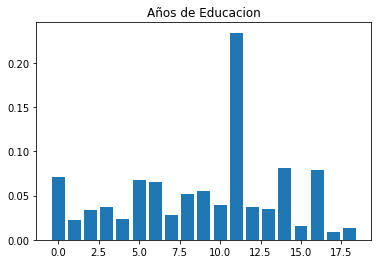

In [46]:
años_educ=df_merge['años_educ']
pmf_educ = Pmf.from_seq(años_educ)
pmf_educ.bar()
plt.title('Años de Educacion')
plt.show()


##### Se observa que, aproximadamente, un 25% de la muestra cuenta con 11 años de educación.




# Pregunta 3).

In [47]:
df_merge=df_merge[df_merge['ingresos']!=0]
df_merge = df_merge.dropna(subset=['años_educ','ingresos'])

In [48]:
df_merge

,conglome,vivienda,hogar,codperso,ubigeo,edad,sexo,facpob07,años_educ,ingresos,fac500a
0,005009,041,11,01,010101,60.0,2.0,94.218208,0.0,665.416667,73.243919
2,005009,056,11,01,010101,48.0,2.0,94.218208,10.0,174.333333,73.243919
3,005009,056,11,02,010101,25.0,2.0,94.218208,11.0,958.083333,111.098007
4,005009,056,11,03,010101,16.0,2.0,94.218208,11.0,1115.333333,93.555817
6,005009,098,11,01,010101,41.0,2.0,94.218208,11.0,895.066691,111.098007
...,...,...,...,...,...,...,...,...,...,...,...
92088,011350,059,11,02,180101,29.0,1.0,80.257660,14.0,3084.416667,105.741028
92089,011350,078,11,01,180101,28.0,2.0,80.257660,14.0,796.250000,89.239273
92090,011350,097,11,01,180101,35.0,1.0,80.257660,14.0,1448.083333,105.741028
92092,011350,116,11,01,180101,41.0,2.0,80.257660,10.0,818.500000,89.239273


In [49]:
df_merge['ingresos'].describe()

count    56101.000000
mean      1298.946901
std       1501.639448
min          1.750000
25%        401.083333
50%        922.250000
75%       1626.900004
max      31679.666667
Name: ingresos, dtype: float64

##### reescalamos los ingresos a logaritmos

In [50]:
df_merge['ingresos1']=np.log(df_merge['ingresos'])
df_merge['ingresos1'].describe()

count    56101.000000
mean         6.641593
std          1.137482
min          0.559616
25%          5.994169
50%          6.826816
75%          7.394432
max         10.363430
Name: ingresos1, dtype: float64

##### Regresión

In [51]:
años_educ=df_merge['años_educ']
ingresos1=df_merge['ingresos1']

In [52]:
reg=linregress(años_educ,ingresos1)
print(reg)

LinregressResult(slope=0.11012553317530714, intercept=5.594507788356502, rvalue=0.46450231750487736, pvalue=0.0, stderr=0.0008864340062380053)


In [53]:
print('Por cada año adicional de educación, mis ingresos aumentan en '+ str(round(reg.slope*100,2)) + '%') #pendiente

Por cada año adicional de educación, mis ingresos aumentan en 11.01%


In [54]:
print('La significancia del estimador es '+ str(reg.pvalue))

La significancia del estimador es 0.0


# Pregunta 4).

#### La regresión anterior no representa un efecto causal netamente.La descripción de la base nos indica que los ingresos no solo dependen de los años de educación, sino que dependen de otras variables como, por ejemplo, el sexo de la persona. Al regresionar los ingresos solo con los años de educación estamos omitiendo variables relevantes, lo cual ocasiona un sesgo en la estimación. Por la literatura revisada, se estaría sobreestimando el impacto de la educación sobre los ingresos.

In [55]:
resultados=smf.ols('ingresos1 ~ años_educ+C(sexo)', data=df_merge).fit()

In [56]:
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ingresos1   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     9342.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:33:21   Log-Likelihood:                -78766.
No. Observations:               56101   AIC:                         1.575e+05
Df Residuals:                   56098   BIC:                         1.576e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7874      0.010    579.204      0.000       5.768       5.807
C(sexo)[T.2.0]    -0.4255      0.008    -50.493      0.000      -0.442      -0.409
años_educ          0.1087      0.001    125.350      0.000       0.107       0.110
==============================================================================
Omnibus:                     7248.988   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13293.158
Skew:                          -0.846   Prob(JB):                         0.00
Kurtosis:                       4.680   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Como se puede ver, al introducir la variable sexo, el efecto de los años de educación es menor en comparación a la regresión anterior.